In [1]:
import ase
import ase.io
from ase.io import xsf
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

In [2]:
dataframe_df2 = pd.read_pickle("pickle_files/DataFrame_df2.pkl")
dataframe_df2.head()

,uuid,structure,cell,volume,relevant_dimension_of_highest_dimensionality_substructure,binding_energy_per_substructure,binding_energy,label,number_of_atoms_in_bulk,number_of_highest_dimensionality_substructures_in_bulk,sub_structure_spg,sub_structure_dim,energy_bulk,sub_structure_formula,PMG Structure from ASE Atoms
0,dec2d070-d2ad-41f3-b742-786368ade33a,"(Atom('Cd', [-0.0, -0.0, 29.0441583], index=0)...","[[2.1044124705, 1.2149831063, 34.279850741], [...",525.885600,15.340954,-0.165000,10.755509,EE,15,5,"[C2/m (12), C2/m (12), C2/m (12), C2/m (12), C...","[2, 2, 2, 2, 2]",-17198.871453,"[CdI2, CdI2, CdI2, CdI2, CdI2]",[[-7.99325051e-18 -1.35384926e-17 2.90441583e...
1,51e630e8-d94f-421c-bd1e-3e2f298e740c,"(Atom('Fe', [0.0, 0.0, 0.0], index=0), Atom('C...","[[3.35814166734363, 3.21879556184565e-14, -3.2...",52.188194,9.766268,-0.149888,15.347484,EE,3,1,[P-3m1 (164)],[2],-5361.474444,[Cl2Fe],"[[0. 0. 0.] Fe, [7.65128701e-17 2.06980071e+00..."
2,527e7b32-d211-4743-9631-120122819190,"(Atom('Er', [2.1386, 4.301805, 3.209025], inde...","[[2.14789490163679, -12.5878501270869, 0.0], [...",232.520056,18.471785,-0.454048,24.580650,EE,8,1,[P2_1/m (11)],[2],-26090.090963,[Er2Te6],"[[2.1386 4.301805 3.209025] Er, [ 2.1386 -..."
3,37bf14b1-6529-436c-a519-e1ad9b208784,"(Atom('Ba', [0.0, 0.0, 9.5697], index=0), Atom...","[[-2.0745739339, 2.0745739339, 7.4278571834], ...",127.873741,17.215428,-0.747937,43.445746,PE,3,1,[C2/m (12)],[2],-2866.173187,[Ba2Hg],[[-1.10578213e-16 1.10578213e-16 9.56970000e...
4,e7a9cec3-f11a-4d16-a8c5-ebd758bb6592,"(Atom('Ba', [0.0, 2.414, 1.49473], index=0), A...","[[4.6829418165, 0.0, 0.0], [0.0, 4.6829418165,...",166.823529,21.929944,-0.532853,24.297979,EE,6,1,[P4/nmm (129)],[2],-3217.539658,[Ba2H2I2],"[[0. 2.414 1.49473] Ba, [2.414 0. ..."


In [52]:
structures = list(dataframe_df2["PMG Structure from ASE Atoms"])
gridpoints = list(dataframe_df2.index)

In [53]:
features = {n:{} for n in gridpoints}
for name in gridpoints:
    features[name]["structure"]=dataframe_df2["PMG Structure from ASE Atoms"][name]

In [54]:
data=pd.DataFrame.from_dict(features).T
data

,structure
0,[[-7.99325051e-18 -1.35384926e-17 2.90441583e...
1,"[[0. 0. 0.] Fe, [7.65128701e-17 2.06980071e+00..."
2,"[[2.1386 4.301805 3.209025] Er, [ 2.1386 -..."
3,[[-1.10578213e-16 1.10578213e-16 9.56970000e...
4,"[[0. 2.414 1.49473] Ba, [2.414 0. ..."
...,...
2387,[[-2.45673852e-17 2.87064327e+00 2.28500000e...
2388,"[[ 8.7759233 -1.51816627 6.20947541] K, [ 2...."
2389,"[[6.06416256 0.5661043 0.86358119] Li, [4.004..."
2390,[[ 3.17549986e-17 -2.74568748e-17 2.43148410e...


In [55]:
features_dict={}
## 1. initialize the dictionary for each site
for index,row in data.iterrows():
    structure=row["structure"]
    features_dict[index]={}

In [56]:
#features_dict

In [57]:
from matminer.featurizers.structure import BondFractions

***BondFractions:*** *Compute the fraction of each bond in a structure, based on NearestNeighbors.*

*For example, in a structure with 2 Li-O bonds and 3 Li-P bonds: Li-0: 0.4 Li-P: 0.6*

***Ref: https://pubs.acs.org/doi/10.1021/acs.jpclett.5b00831***

In [58]:
### Bond Fractions
BD = BondFractions()
BD.fit(list(data['structure']))
colnames=BD._generate_column_labels(multiindex=False,return_errors=False)
for index,row in data.iterrows():
    structure=row["structure"]
    feat=BD.featurize(structure)
    features_dict[index].update(dict(zip(colnames, feat)))

/Users/mohammad/anaconda3/lib/python3.7/site-packages/pymatgen/analysis/local_env.py:4136: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  "No oxidation states specified on sites! For better results, set "
/Users/mohammad/anaconda3/lib/python3.7/site-packages/pymatgen/analysis/local_env.py:3939: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "


KeyboardInterrupt: 

In [ ]:
BD.citations()

In [5]:
from matminer.featurizers.structure import BagofBonds

***BagofBonds:*** 

*Compute a Bag of Bonds vector, as first described by Hansen et al. (2015).*

*The Bag of Bonds approach is based creating an even-length vector from a Coulomb matrix output. Practically, it represents the Coloumbic interactions between each possible set of sites in a structure as a vector.*

*BagofBonds must be fit to an iterable of structures using the “fit” method before featurization can occur. This is because the bags and the maximum lengths of each bag must be set prior to featurization. We recommend fitting and featurizing on the same data to maintain consistency between generated feature sets. This can be done using the fit_transform method (for lists of structures) or the fit_featurize_dataframe method (for dataframes).*

***Ref: https://pubs.acs.org/doi/10.1021/acs.jpclett.5b00831***

In [179]:
###Bag of Bonds vector
BB = BagofBonds()
BB.fit(list(data['structure']))
colnames=BB._generate_column_labels(multiindex=False,return_errors=False)
for index,row in data.iterrows():
    structure=row["structure"]
    feat=BD.featurize(structure)
    features_dict[index].update(dict(zip(colnames, feat)))

/Users/mohammad/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [7]:
BB.citations()

['@article{doi:10.1021/acs.jpclett.5b00831, author = {Hansen, Katja and Biegler, Franziska and Ramakrishnan, Raghunathan and Pronobis, Wiktorand von Lilienfeld, O. Anatole and Muller, Klaus-Robert andTkatchenko, Alexandre},title = {Machine Learning Predictions of Molecular Properties: Accurate Many-Body Potentials and Nonlocality in Chemical Space},journal = {The Journal of Physical Chemistry Letters},volume = {6},number = {12},pages = {2326-2331},year = {2015},doi = {10.1021/acs.jpclett.5b00831}, note ={PMID: 26113956},URL = {http://dx.doi.org/10.1021/acs.jpclett.5b00831}}']

In [180]:
df_features=pd.DataFrame.from_dict(features_dict).T.astype(float)
df_features.head()

,Ag - Ag bond frac.,Ag - As bond frac.,Ag - Au bond frac.,Ag - B bond frac.,Ag - Bi bond frac.,Ag - Br bond frac.,Ag - C bond frac.,Ag - Cl bond frac.,Ag - Cr bond frac.,Ag - Cu bond frac.,...,Mn site #0,Mn site #1,Mn site #2,Mn site #3,Mn site #4,Mn site #5,Mn site #6,Mn site #7,Mn - Tl bond #0,Mn - Tl bond #1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [328]:
df_features.to_pickle("pickle_files/Features_BondFractions_BagofBonds.pkl")

In [3]:
df_features = pd.read_pickle("pickle_files/Features_BondFractions_BagofBonds.pkl")

In [4]:
features_MultipleFeaturizer = pd.read_pickle("pickle_files/features_MultipleFeaturizer.pkl")

***First we check what would happen if we only use these two as features:***

In [12]:
df = df_features.copy()

In [41]:
df.head()

,Ag - Ag bond frac.,Ag - As bond frac.,Ag - Au bond frac.,Ag - B bond frac.,Ag - Bi bond frac.,Ag - Br bond frac.,Ag - C bond frac.,Ag - Cl bond frac.,Ag - Cr bond frac.,Ag - Cu bond frac.,...,Mn site #1,Mn site #2,Mn site #3,Mn site #4,Mn site #5,Mn site #6,Mn site #7,Mn - Tl bond #0,Mn - Tl bond #1,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [14]:
df = pd.concat([df, features_MultipleFeaturizer['label']], axis = 1)

In [16]:
X = np.array(df.drop('label', axis = 1))
y = df['label']
print('Input data shape:', X.shape)

Input data shape: (2392, 2676)


In [17]:
import pandas as pd
failed = np.any(pd.isnull(X), axis=1)
print('Number failed: {}/{}'.format(np.sum(failed), len(failed)))

Number failed: 0/2392


In [18]:
df = df.dropna()
df.replace(to_replace='PE', value='EE', inplace=True)
df.replace(to_replace='EE', value=1, inplace=True)
df.replace(to_replace='HBE', value=0, inplace=True)

In [19]:
X = df.drop('label', axis = 1).values
y = df['label'].values

In [20]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
RF = RandomForestClassifier(n_estimators=600)
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [19]:
pred_RF = RF.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(y_test, pred_RF))
print("\n")
print(confusion_matrix(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55       167
           1       0.86      0.90      0.88       551

    accuracy                           0.81       718
   macro avg       0.73      0.70      0.71       718
weighted avg       0.80      0.81      0.80       718



[[ 84  83]
 [ 55 496]]


***Let's combine these features with the Multifeaturizations***

In [26]:
df = df_features.copy()

In [60]:
features_MultipleFeaturizer = pd.read_pickle("features_MultipleFeaturizer.pkl")

In [28]:
df = pd.concat([df, features_MultipleFeaturizer], axis = 1)

In [29]:
X = np.array(df.drop('label', axis = 1))
y = df['label']
print('Input data shape:', X.shape)

Input data shape: (2392, 2949)


In [30]:
import pandas as pd
failed = np.any(pd.isnull(X), axis=1)
print('Number failed: {}/{}'.format(np.sum(failed), len(failed)))

Number failed: 179/2392


In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
from matminer.datasets import load_dataset
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers.composition import ElementProperty, Stoichiometry, ValenceOrbital, IonProperty
from matminer.featurizers.structure import (SiteStatsFingerprint, StructuralHeterogeneity,
                                            ChemicalOrdering, StructureComposition, MaximumPackingEfficiency)
from matminer.featurizers.conversions import DictToObject
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy import stats
from tqdm import tqdm_notebook as tqdm
import numpy as np

In [32]:
model = Pipeline([
    ('imputer', SimpleImputer()), # For the failed structures
    ('model', RandomForestClassifier(n_estimators=1000, n_jobs=-1))
])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
model.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('model',
                 RandomForestClassifier(n_estimators=1000, n_jobs=-1))])

In [73]:
predictions = model.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

          EE       0.83      0.86      0.84       341
         HBE       0.72      0.69      0.71       167
          PE       0.68      0.66      0.67       210

    accuracy                           0.76       718
   macro avg       0.74      0.74      0.74       718
weighted avg       0.76      0.76      0.76       718



[[292  19  30]
 [ 16 116  35]
 [ 45  26 139]]


***In case of binary classification***

In [35]:
df = df.dropna()

In [36]:
df.replace(to_replace='PE', value='EE', inplace=True)
df.replace(to_replace='EE', value=1, inplace=True)
df.replace(to_replace='HBE', value=0, inplace=True)

In [37]:
X = df.drop('label', axis = 1).values
y = df['label'].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

***Logestic Regression***

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
logmodel = LogisticRegression()

In [82]:
logmodel.fit(X_train,y_train)

/home/mvahdat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [83]:
predictions = logmodel.predict(X_test)

***Evaluation Logestic Regression***

In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.35      0.45       139
           1       0.85      0.95      0.89       525

    accuracy                           0.82       664
   macro avg       0.74      0.65      0.67       664
weighted avg       0.80      0.82      0.80       664



[[ 48  91]
 [ 28 497]]


***Decision Tree***

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
predictions = dtree.predict(X_test)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61       139
           1       0.91      0.87      0.89       525

    accuracy                           0.83       664
   macro avg       0.74      0.76      0.75       664
weighted avg       0.84      0.83      0.83       664



[[ 91  48]
 [ 66 459]]


***Random Forest Model***

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
RF = RandomForestClassifier(n_estimators=600)
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [41]:
pred_RF = RF.predict(X_test)

In [42]:
print(classification_report(y_test, pred_RF))
print("\n")
print(confusion_matrix(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.89      0.50      0.64       139
           1       0.88      0.98      0.93       525

    accuracy                           0.88       664
   macro avg       0.88      0.74      0.79       664
weighted avg       0.88      0.88      0.87       664



[[ 70  69]
 [  9 516]]


In [43]:
import joblib

In [44]:
joblib.dump(RF, "models/random_forest_model_including_BFBB_Features.joblib")

['random_forest_model_including_BFBB_Features.joblib']

***Neural Network***

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [37]:
X.shape

(2213, 2949)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [39]:
model = Sequential()

2021-11-23 11:41:01.037708: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-23 11:41:01.038159: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-23 11:41:01.039207: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [40]:
model.add(Dense(units=2949,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=2000,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1500,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1000,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [41]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

2021-11-23 11:41:06.210722: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-23 11:41:06.230173: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3600000000 Hz


Epoch 1/600
49/49 [==============================] - 8s 139ms/step - loss: 39.7274 - val_loss: 0.6128
Epoch 2/600
49/49 [==============================] - 4s 91ms/step - loss: 0.6459 - val_loss: 0.4894
Epoch 3/600
49/49 [==============================] - 6s 114ms/step - loss: 0.5820 - val_loss: 0.5327
Epoch 4/600
49/49 [==============================] - 4s 88ms/step - loss: 0.5077 - val_loss: 0.4462
Epoch 5/600
49/49 [==============================] - 5s 102ms/step - loss: 0.4996 - val_loss: 0.4556
Epoch 6/600
49/49 [==============================] - 5s 102ms/step - loss: 0.5045 - val_loss: 0.4330
Epoch 7/600
49/49 [==============================] - 5s 105ms/step - loss: 0.4666 - val_loss: 0.4157
Epoch 8/600
49/49 [==============================] - 5s 112ms/step - loss: 0.4807 - val_loss: 0.4770
Epoch 9/600
49/49 [==============================] - 5s 94ms/step - loss: 0.4814 - val_loss: 0.4315
Epoch 10/600
49/49 [==============================] - 5s 101ms/step - loss: 0.4592 - val_loss

<AxesSubplot:>

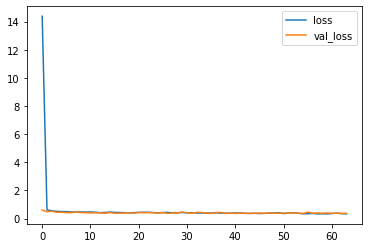

In [42]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [43]:
predictions = model.predict(X_test)

In [44]:
y_test.shape

(664,)

In [45]:
predictions = predictions.reshape(len(y_test))
predictions.shape

(664,)

In [46]:
pred = [round(i) for i in predictions]

In [47]:
print(classification_report(y_test, pred))
print("\n")
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.29      0.42       139
           1       0.84      0.97      0.90       525

    accuracy                           0.83       664
   macro avg       0.79      0.63      0.66       664
weighted avg       0.82      0.83      0.80       664



[[ 41  98]
 [ 15 510]]
